In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

## **Funções utilizadas**

Teorema de Bolzano

In [3]:
def bolzano(f, a, b):
  return f(a)*f(b) < 0

Método do ponto-fixo

In [4]:
def fix_point(f, g, x0, e=1e-10, maxiter=100):
    i = 1

    while i <= maxiter:
        x1 = g(x0)
        erro_perc = abs(x1 - x0) / abs(x1)

        print(f'iteração:{i}, raiz:{x1}, f(x):{f(x1)}, erro:{erro_perc}')

        if erro_perc <= e:
            break

        x0 = x1
        i += 1

    return x1, f(x1)

Método de Newton-Raphson

In [5]:
def newton_raphson(f, dfdx, x0, e=1e-10, maxiter=100):
    i = 1
    results = []

    while i <= maxiter:
        xr = x0 - f(x0) / dfdx(x0)
        erro_perc = abs(xr - x0) / abs(x0)

        results.append((xr, f(xr)))

        print(f'iteração:{i}, raiz:{xr}, f(x):{f(xr)}, erro:{erro_perc}')

        if erro_perc <= e:
            break

        x0 = xr
        i += 1

    return results

Método das Secantes

In [ ]:
def secants(f, x0, x1, e=1e-10, maxiter=100):
    i = 1
    results = []

    while i <= maxiter:
        xr = x0 - f(x0) / ((f(x0) - f(x1)) / (x0 - x1))
        erro_perc = abs(xr - x0) / abs(x0)

        results.append((xr, f(xr)))

        print(f'iteração:{i}, raiz:{xr}, f(x):{f(xr)}, erro:{erro_perc}')

        if erro_perc <= e:
            break

        x1, x0 = x0, xr
        i += 1

    return results

In [ ]:
def secants_sig(f, x0, x1, alg_sig, e=1e-10, maxiter=100):
    i = 1
    delta_x = 10**(-1 * (alg_sig + 1))

    while i <= maxiter:
        xr = x0 - f(x0) / ((f(x0) - f(x1)) / (x0 - x1))
        erro_perc = abs(xr - x0) / abs(x0)

        print(f'iteração:{i}, raiz:{xr}, f(x):{f(xr)}, erro:{erro_perc}')

        if abs(xr - x0) <= delta_x:
            break

        x1, x0 = x0, xr
        i += 1

    return xr, f(xr)

Busca Multi-Intervalar

In [ ]:
def encontra_varios_intervalos(inicio, xmax, passo, f):
    vet_inicio = []
    vet_final = []

    while passo > 1e-4:
        inicio_temp = inicio

        while inicio_temp < xmax:
            final = inicio_temp + passo

            if f(inicio_temp) * f(final) < 0:
                vet_inicio.append(inicio_temp)
                vet_final.append(final)

            inicio_temp = final

        if vet_inicio:
            return vet_inicio, vet_final

        passo /= 10

    return vet_inicio, vet_final

## **Questão 1**

Use a iteração de ponto fixo simples para localizar a raiz de $𝑓(𝑥) =
2*sen(\sqrt{x}) - x$.
Use a aproximação inicial $x_0 = 0,5$ e itere até $𝜀_a ≤ 0,001\%$.

In [ ]:
def f1(x):
    return 2*np.sin(math.sqrt(x)) - x

In [ ]:
def g1(x):
    return 2*np.sin(math.sqrt(x))

In [ ]:
fix_point(f1, g1, 0.5, 0.00001, 100)

iteração:1, raiz:1.299273878160125, f(x):0.5178736259773702, erro:0.6151696663770077
iteração:2, raiz:1.8171475041374952, f(x):0.13342641315226378, erro:0.28499261881504645
iteração:3, raiz:1.950573917289759, f(x):0.019168596048722675, erro:0.0684036692839891
iteração:4, raiz:1.9697425133384816, f(x):0.0023263679354648126, erro:0.00973152374938294
iteração:5, raiz:1.9720688812739464, f(x):0.00027529699872097524, erro:0.0011796585593714104
iteração:6, raiz:1.9723441782726674, f(x):3.247770491832114e-05, erro:0.0001395785795165192
iteração:7, raiz:1.9723766559775857, f(x):3.830104145619018e-06, erro:1.64662793082105e-05
iteração:8, raiz:1.9723804860817313, f(x):4.516657114983502e-07, erro:1.9418688091098392e-06


(1.9723804860817313, 4.516657114983502e-07)

## **Questão 2)**


Determine a maior raiz real de $𝑓(𝑥) = 2x³ - 11,7x² + 17,7x - 5$:

Calcule os erro_percs relativos percentuais aproximados para suas soluções.

In [ ]:
def f2(x):
    return 2*x**3 - 11.7*x**2 + 17.7*x - 5

### a) Graficamente

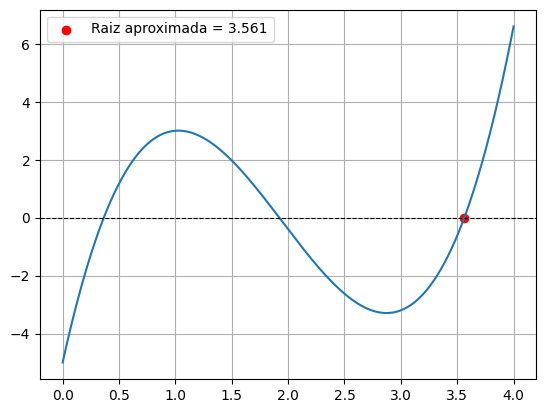

In [ ]:
x = np.linspace(0, 4, 1000)
y = f2(x)

plt.grid()
plt.plot(x, y)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.scatter([3.561], [0], color='red', label='Raiz aproximada = 3.561')
plt.legend()

plt.show()

### b) Pelo método da iteração de ponto fixo (três iterações, $x_0$ = 3). Observação: certifique-se de desenvolver uma solução que convirja para a raiz.

In [ ]:
def g2(x):
  return ((11.7*x**2 - 17.7*x + 5) / 2) ** (1/3)

In [ ]:
fix_point(f2, g2, 3.5, maxiter=3)

iteração:1, raiz:3.515852435790163, f(x):-0.4752272923256271, erro:0.002096109178388468
iteração:2, raiz:3.5222482971159037, f(x):-0.41346543506026734, erro:0.001815846239737828
iteração:3, raiz:3.5277940996662207, f(x):-0.35928756917522975, erro:0.0015720312449192299


(3.5277940996662207, -0.35928756917522975)

### c) Pelo método de Newton-Raphson (três iterações, $x_0$ = 3).

In [ ]:
def df2_dx(x):
    return 6*x**2 - 23.4*x + 17.7

In [ ]:
newton_raphson(f2, df2_dx, 3.5, maxiter=3)

iteração:1, raiz:3.567204301075268, f(x):0.04260973361331821, erro:0.019201228878648027
iteração:2, raiz:3.5631758112603076, f(x):0.00015734027900293768, erro:0.0011293128946234445
iteração:3, raiz:3.5631608250691067, f(x):2.173791813220305e-09, erro:4.205852305553905e-06


(3.5631608250691067, 2.173791813220305e-09)

### d) Pelo método da secante (três iterações, $x_{-1} = 3, x_0 = 4$).

In [ ]:
secants(f2, 3, 4, maxiter=3)

iteração:1, raiz:3.326530612244898, f(x):-1.9688531139236005, erro:0.10884353741496595
iteração:2, raiz:3.848719166657446, f(x):3.833827310233133, erro:0.15697692740009117
iteração:3, raiz:3.5037095168646224, f(x):-0.5903734182763429, erro:0.08964271874699013


(3.5037095168646224, -0.5903734182763429)

In [ ]:
secants(f2, 3, 4, maxiter=3)

iteração:1, raiz:3.326530612244898, f(x):-1.9688531139236005, erro:0.10884353741496595
iteração:2, raiz:3.848719166657446, f(x):3.833827310233133, erro:0.15697692740009117
iteração:3, raiz:3.5037095168646224, f(x):-0.5903734182763429, erro:0.08964271874699013


(3.5037095168646224, -0.5903734182763429)

## **Questão 3**

Use o método de Newton-Raphson para determinar uma raiz real de $f(x) = -1 + 5,5x - 4x² +0,5x³$ usando aproximações iniciais:

Discuta e use métodos gráficos e analíticos para explicar quaisquer
peculiaridades nos resultados.

In [6]:
def f3(x):
  return -1 + 5.5*x - 4*x**2 + 0.5*x**3

In [7]:
def df3dx(x):
  return 5.5 - 8*x + 1.5*x**2

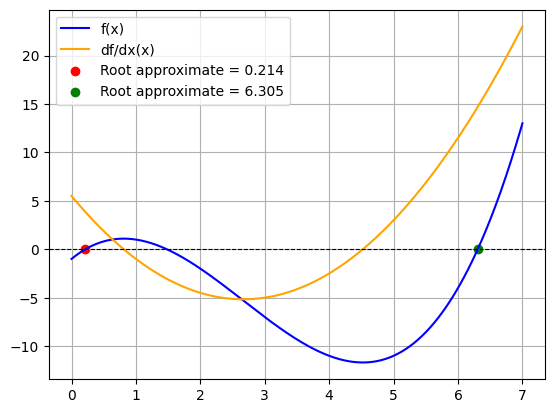

In [11]:
x = np.linspace(0, 7, 1000)
y = f3(x)
dydx = df3dx(x)

plt.grid()
plt.plot(x, y, label='f(x)', color='blue')
plt.plot(x, dydx, label="df/dx(x)", color='orange')

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.scatter([0.214], [0], color='red', label='Root approximate = 0.214')
plt.scatter([6.305], [0], color='green', label='Root approximate = 6.305')
plt.legend()

plt.show()

### a) $4,52$

In [ ]:
results_3a = newton_raphson(f3, df3dx, 4.52)

iteração:1, raiz:-807.2088888887776, f(x):-265593867.75418612, erro:179.5860373647738
iteração:2, raiz:-537.2532003712208, f(x):-78694170.75367752, erro:0.3344310156063618
iteração:3, raiz:-357.2841523281942, f(x):-23316586.06907611, erro:0.33497994598947967
iteração:4, raiz:-237.3068983860304, f(x):-6908481.704990966, erro:0.33580345828480807
iteração:5, raiz:-157.32521824582312, f(x):-2046867.0680020375, erro:0.33703900174911894
iteração:6, raiz:-104.00880649610153, f(x):-606419.2644422775, erro:0.3388929781518807
iteração:7, raiz:-68.47153758740427, f(x):-179640.31588897432, erro:0.34167557638524837
iteração:8, raiz:-44.790406004104675, f(x):-53200.88799775624, erro:0.34585365566050724
iteração:9, raiz:-29.01827254496241, f(x):-15746.406407529348, erro:0.35213196008307845
iteração:10, raiz:-18.525819316553623, f(x):-4654.801931060911, erro:0.3615809043130062
iteração:11, raiz:-11.562926539723993, f(x):-1372.3901592022853, erro:0.37584803445686116
iteração:12, raiz:-6.96615643223604,

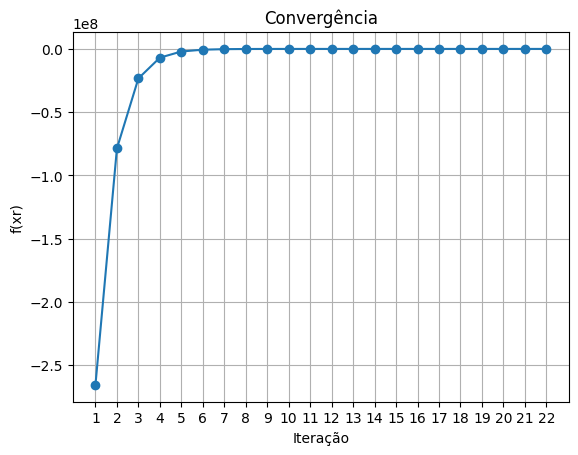

In [ ]:
xr = [result[0] for result in results_3a]
fxr = [result[1] for result in results_3a]

plt.grid()
plt.plot(range(1, len(xr) + 1), fxr, marker='o')

plt.xlabel('Iteração')
plt.xticks(range(1, len(xr) + 1))
plt.ylabel('f(xr)')
plt.title('Convergência')

plt.show()

### b) $4,54$

In [ ]:
results_3b = newton_raphson(f3, df3dx, 4.54)

iteração:1, raiz:124.5406981519502, f(x):904479.5510049041, erro:26.431871839636607
iteração:2, raiz:83.93510468703067, f(x):267945.91438797733, erro:0.3260427640720085
iteração:3, raiz:56.87443067596445, f(x):79358.89095371765, erro:0.32239995544137967
iteração:4, raiz:38.84878974656964, f(x):23491.60413826901, erro:0.31693751858535213
iteração:5, raiz:26.85441860393113, f(x):6945.223663464461, erro:0.3087450399583585
iteração:6, raiz:18.893404114015794, f(x):2047.1724051598771, erro:0.2964508227614337
iteração:7, raiz:13.64146792207766, f(x):598.9374608568935, erro:0.2779772327021822
iteração:8, raiz:10.22877188982599, f(x):171.85396660406178, erro:0.25017073321914896
iteração:9, raiz:8.096892499082177, f(x):46.70902878757536, erro:0.20841987813456664
iteração:10, raiz:6.901198364242262, f(x):10.790531599469233, erro:0.14767321351684645
iteração:11, raiz:6.404630408915099, f(x):1.505002753808867, erro:0.07195387367795
iteração:12, raiz:6.309328168803438, f(x):0.05049238657844057, err

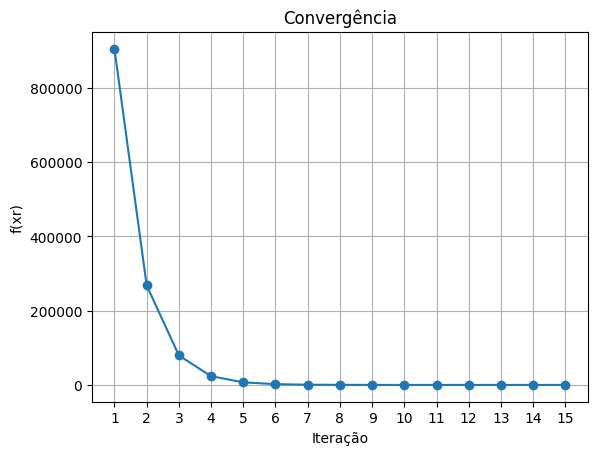

In [ ]:
xr = [result[0] for result in results_3b]
fxr = [result[1] for result in results_3b]

plt.grid()
plt.plot(range(1, len(xr) + 1), fxr, marker='o')

plt.xlabel('Iteração')
plt.xticks(range(1, len(xr) + 1))
plt.ylabel('f(xr)')
plt.title('Convergência')

plt.show()

Discussão: Utilizando a aproximação inicial do item B, houve uma convergência mais rápida pelo valor inicial mais proximo da raiz, além da derivada da função convergir

## **Questão 4**

Determine a menor raiz real de $f(x) = -12 - 21x  + 18x² - 2,4x³$:

In [ ]:
def f4(x):
    return -12 - 21*x + 18*x**2 - 2.4*x**3

### a) graficamente

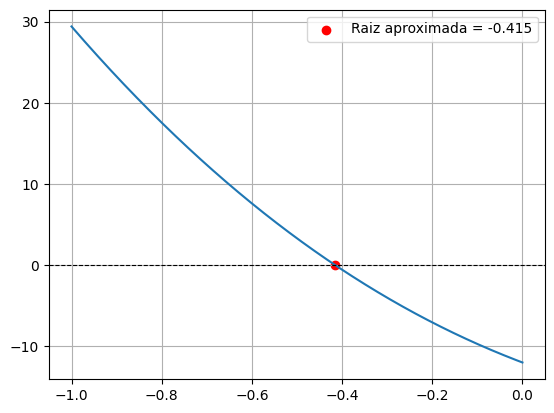

In [ ]:
x = np.linspace(-1, 0, 1000)
y = f4(x)

plt.grid()
plt.plot(x, y)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.scatter([-0.415], [0], color='red', label='Raiz aproximada = -0.415')
plt.legend()

plt.show()

### b) Usando o método da secante para um valor de $𝜀_s$ correspondente a três algarismos significativos.

In [ ]:
encontra_varios_intervalos(-1, 0, 1e-2, f4)

([-0.4199999999999995], [-0.4099999999999995])

In [ ]:
secants_sig(f4, -0.4199999999999995, -0.4099999999999995, alg_sig=3)

iteração:1, raiz:-0.41534666950689725, f(x):-0.0005221983676506614, erro:0.011079358316910102
iteração:2, raiz:-0.41536067235367197, f(x):-1.364349959731559e-06, erro:3.371363683099504e-05


(-0.41536067235367197, -1.364349959731559e-06)

## **Questão 5**

Localize a primeira raiz positiva de $f(x) = sen(x) + cos(1 + x²) − 1$, em que x está em radianos. Use quatro iterações do método da secante com aproximações iniciais:

Use o método gráfico para explicar seus resultados.

In [ ]:
def f5(x):
    return np.sin(x) + np.cos(1+x**2) - 1

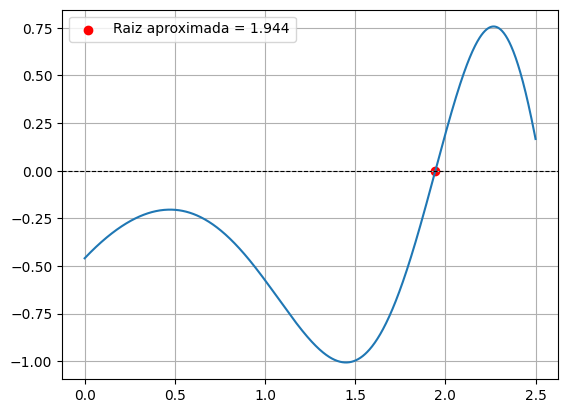

In [ ]:
x = np.linspace(0, 2.5, 1000)
y = f5(x)

plt.grid()
plt.plot(x, y)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.scatter([1.944], [0], color='red', label='Raiz aproximada = 1.944')
plt.legend()

plt.show()

### a) $x_{i - 1} = 1,0$ e $x_{i} = 3,0$

In [ ]:
results_5a = secants(f5, 1, 3, maxiter=4)

iteração:1, raiz:-0.02321427848421953, f(x):-0.48336343707408713, erro:1.0232142784842195
iteração:2, raiz:-5.439612172736037, f(x):0.4244438797007315, erro:233.32182811254484
iteração:3, raiz:-2.9071838768211573, f(x):-2.231905108347263, erro:0.4655530974446491
iteração:4, raiz:-5.034968921484668, f(x):0.2937836567867218, erro:0.7319059044143175


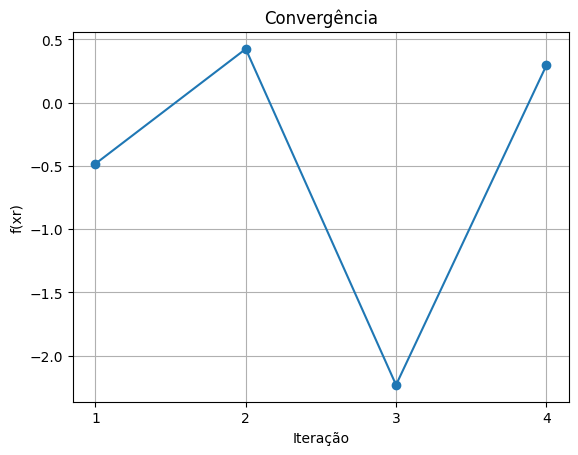

In [ ]:
xr = [result[0] for result in results_5a]
fxr = [result[1] for result in results_5a]

plt.grid()
plt.plot(range(1, len(xr) + 1), fxr, marker='o')

plt.xlabel('Iteração')
plt.xticks(range(1, len(xr) + 1))
plt.ylabel('f(xr)')
plt.title('Convergência')

plt.show()

### b) $x_{i - 1} = 1,5$ e $x_{i} = 2,5$

In [ ]:
results_5b = secants(f5, 1.5, 2.5, maxiter=4)

iteração:1, raiz:2.356928734995134, f(x):0.6698423142602048, erro:0.5712858233300894
iteração:2, raiz:2.0124852618970177, f(x):0.23535636528777326, erro:0.1461408094287702
iteração:3, raiz:1.8259039373059818, f(x):-0.40185726453614534, erro:0.0927118961433585
iteração:4, raiz:1.9435710071933652, f(x):-0.003646258450583084, erro:0.06444318755399286


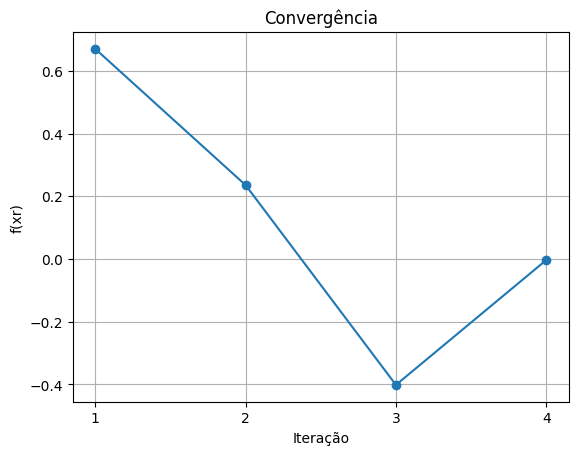

In [ ]:
xr = [result[0] for result in results_5b]
fxr = [result[1] for result in results_5b]

plt.grid()
plt.plot(range(1, len(xr) + 1), fxr, marker='o')

plt.xlabel('Iteração')
plt.xticks(range(1, len(xr) + 1))
plt.ylabel('f(xr)')
plt.title('Convergência')

plt.show()

### c) $x_{i - 1} = 1,5$ e $x_{i} = 2,25$

In [ ]:
results_5c = secants(f5, 1.5, 2.25, maxiter=4)

iteração:1, raiz:1.9270179932081408, f(x):-0.06176948466194321, erro:0.28467866213876053
iteração:2, raiz:1.9552324151868437, f(x):0.037329876169362564, erro:0.014641493788924542
iteração:3, raiz:1.9446042852996286, f(x):-1.4550467046237081e-05, erro:0.005435737360256188
iteração:4, raiz:1.9446084263259507, f(x):4.2672154698664144e-09, erro:2.129495627142794e-06


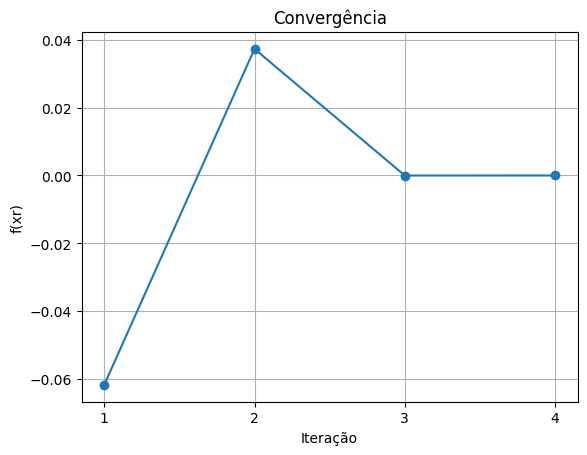

In [ ]:
xr = [result[0] for result in results_5c]
fxr = [result[1] for result in results_5c]

plt.grid()
plt.plot(range(1, len(xr) + 1), fxr, marker='o')

plt.xlabel('Iteração')
plt.xticks(range(1, len(xr) + 1))
plt.ylabel('f(xr)')
plt.title('Convergência')

plt.show()

## **Questão 6**

Determine a raiz real de $x^{3,5} = 80$, com o método da secante até $𝜀_s = 0,1\%$. Use uma aproximação inicial $x_{i - 1} = 3,0$ e $x_{i} = 3,5$.

In [ ]:
def f6(x):
    return x - 80**(2/7)

In [ ]:
secants(f6, 3, 3.5, e=0.001)

iteração:1, raiz:3.4973572431802795, f(x):0.0, erro:0.16578574772675983
iteração:2, raiz:3.4973572431802795, f(x):0.0, erro:0.0


[(3.4973572431802795, 0.0), (3.4973572431802795, 0.0)]

In [ ]:
!jupyter nbconvert --to html /content/KNN.ipynb